In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random

In [2]:
pd.set_option('display.max_colwidth', -1)

In [5]:
movie_lines_file = 'data/cornell-movie-dialogs/movie_lines.txt'

In [6]:
with open(movie_lines_file) as f:
    movie_lines = [line.strip().split('+++$+++') for line in f.readlines()];

lines_df = pd.DataFrame([{'LineNumber': d[0].strip(), 
                                'Person': d[3].strip(),
                                'Line': d[4].strip(),
                                 'Movie' : d[2].strip()} 
                              for d in movie_lines])
lines_df = lines_df.set_index('LineNumber')

In [7]:
lines_df.head(10)

,Line,Movie,Person
LineNumber,,,
L1045,They do not!,m0,BIANCA
L1044,They do to!,m0,CAMERON
L985,I hope so.,m0,BIANCA
L984,She okay?,m0,CAMERON
L925,Let's go.,m0,BIANCA
L924,Wow,m0,CAMERON
L872,Okay -- you're gonna need to learn how to lie.,m0,BIANCA
L871,No,m0,CAMERON
L870,"I'm kidding. You know how sometimes you just become this ""persona""? And you don't know how to quit?",m0,BIANCA


In [8]:
len(lines_df)

304713

In [9]:
lines_df.nunique()

Line      265786
Movie     617   
Person    5356  
dtype: int64

In [10]:
lines_df_small = lines_df.head(50000)

In [11]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [12]:
documents_dataset = DocumentDataset(lines_df_small, 'Line')

In [13]:
documents_dataset

In [14]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [15]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=10)

In [16]:
docVecModel['L1045']

array([-2.6732970e-03,  4.1353714e-04,  2.9677683e-03,  2.9606703e-03,
        2.0233551e-03,  3.4958552e-04, -9.2168985e-04, -1.1420773e-03,
       -2.4593802e-04, -2.5900090e-03, -2.0126812e-03,  4.4025904e-03,
       -3.1118894e-03,  2.0809656e-03,  2.0601996e-03,  3.4130928e-03,
       -2.6243101e-04, -4.1071693e-03,  3.0793259e-03, -2.5712946e-04,
        1.5744346e-03, -1.0704627e-03,  4.3766918e-03, -2.2261490e-03,
       -3.3058824e-03, -3.7674806e-03, -3.7239762e-03, -3.7970070e-03,
        2.9841792e-03, -3.8563949e-03,  4.3876530e-03, -3.4242077e-04,
       -7.3505030e-04, -1.4691928e-03, -3.7747980e-03, -1.7856838e-03,
       -3.6680682e-03,  1.0491136e-03, -2.1352421e-03,  1.4902439e-03,
        2.5880793e-03, -3.8740195e-03,  1.6297477e-03,  2.9219456e-03,
        3.8193164e-03,  3.0087146e-03, -4.1907565e-03,  9.7050297e-04,
        1.4135049e-03,  1.8960496e-05, -4.6344306e-03, -1.0052497e-03,
        1.3476197e-04,  7.5302343e-04,  2.7484917e-03, -3.2639031e-03,
      

In [17]:
docVecModel['L872']

array([ 0.00120433, -0.00219427,  0.00388083,  0.00245874,  0.00116642,
       -0.00265577,  0.00417811,  0.0022068 , -0.00051487, -0.00458973,
        0.00230264,  0.00491255, -0.00328307, -0.00066563,  0.00233356,
        0.00269469,  0.00040689,  0.00247192, -0.00372868,  0.00510666,
       -0.00387389, -0.00529115,  0.00044855, -0.0045768 ,  0.0026524 ,
        0.00072908,  0.00560532, -0.00353582, -0.00181635,  0.00370686,
       -0.0012875 , -0.00136226,  0.0018975 , -0.00095679,  0.00258365,
       -0.00171968, -0.00385173,  0.00269862,  0.001382  ,  0.00323055,
        0.00369065,  0.00053856, -0.00618727, -0.00391659, -0.00020249,
        0.00018618,  0.00347242, -0.00133792, -0.00413927,  0.00625147,
       -0.00308522, -0.00186353, -0.00087372, -0.0011707 ,  0.00135559,
       -0.00245038, -0.00606625, -0.00018087,  0.00210932,  0.00182034,
        0.0017222 ,  0.00303782,  0.00438466, -0.00109215, -0.00267192,
       -0.00084326, -0.00090326,  0.00243858,  0.00398017,  0.00

In [18]:
import matplotlib.pyplot as plt

In [19]:
def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
  
def show_movie_line(line_number):
    line = lines_df_small.ix['L872'].Line
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


Okay -- you're gonna need to learn how to lie.


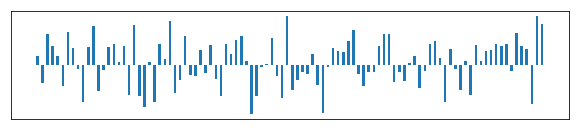

In [20]:
show_movie_line('L872')